<img src="index.png">


# Social Media Analytics - Project Submission by Group 4 <br/>

- BHURJI Prineet Kaur
- FANG Anbing
- EROKH Daria


## (Twitter Analysis for Delta Airlines)

In [1]:
options(warn = -1)

In [2]:
rm(list =ls())
#Loading Libraries for Tweet Collection and Sentiment Analysis
if(!require("wordcloud")) install.packages("wordcloud"); library("wordcloud")
if(!require("scales")) install.packages("scales"); library("scales")
if(!require("tidytext")) install.packages("tidytext"); library("tidytext")
if(!require("textstem")) install.packages("textstem"); library("textstem")
if(!require("lubridate")) install.packages("lubridate"); library("lubridate")
if(!require("tidyr")) install.packages("tidyr"); library("tidyr")
if(!require("rtweet")) install.packages("rtweet"); library("rtweet")
if(!require("dplyr")) install.packages("dplyr"); library("dplyr")
if(!require("textdata")) install.packages("textdata");library("textdata")
if(!require("tm")) install.packages("tm"); library("tm")
#Libraries for topic modelling 
if (!require("topicmodels")) install.packages("topicmodels", quiet=TRUE) ; require("topicmodels")
#Package used for Translation
if (!require("textcat")) install.packages("textcat", quiet=TRUE) ; require("textcat")
#Word cloud of Reply Tweets
if (!require("wordcloud2")) install.packages("wordcloud2", quiet=TRUE) ; require("wordcloud2")
if (!require("stringr")) install.packages("stringr", quiet=TRUE) ; require("stringr")
#Libraries for making Graphs for Visualizations
if (!require("ggplot2")) install.packages("ggplot2", quiet=TRUE) ; require("ggplot2")
if (!require("igraph")) install.packages("igraph", quiet=TRUE) ; require("igraph")
#if (!require("ggraph")) install.packages("ggraph", quiet=TRUE) ; require("ggraph")

Loading required package: wordcloud

Loading required package: RColorBrewer

Loading required package: scales

Loading required package: tidytext

Loading required package: textstem

Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()


Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: tidyr

Loading required package: rtweet

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: textdata

Loading required package: tm

Loading required package: NLP


Attaching package: 

In [3]:
# Creating the Access Token
my_token <- create_token(
  app = "SocialMediaSentiment08",
  consumer_key = "0tQposMwI1jL1ZHlehIoI2GTd",
  consumer_secret = "WIJVexoxuWxjUCYs4en96t2ZR8yNrKyjBfFSlFeZPV8ofKkSo3",
  access_token = "1349815684159647752-jLzDKG7NfIYdvX6mW77eB2Cyr1Dk1E",
  access_secret = "TugAT6JWSafFGprSykSRBDgAXjv5M4p1uHhc8Tf6Kq6hm",
  set_renv=FALSE)

## Tweets made "TO" Delta Airlines

In [4]:
# Retrieving Tweets made by People to Delta Airlines
#tweets_to_delta <- search_fullarchive(q = "@Delta",
#                                   n = 5000, env_name = 'MyDev',
#                                   token = my_token,
#                                   fromDate="202101010000",toDate="202101310000")

# Saving the Retrieved Tweets as an Object so that we don't exhaust our usage limit
# saveRDS(tweets_to_delta, file = "tweets_to_delta.rds")

#### THE ABOVE STEP WAS DONE MANY TIMES USING DIFFERENT API ID's AND RESULT WAS MERGED AS SHOWN BELOW

In [5]:
# Restoring/Reading the object to use it further for our analysis
t1 = readRDS(file = "tweets_to_delta.rds")
t2 = readRDS(file = "tweets_to_delta2.rds")
t3 = readRDS(file = "tweets_to_delta3.rds")
t4 = readRDS(file = "tweets_to_delta4.rds")
t5 = readRDS(file = "tweets_to_delta5.rds")
t6 = readRDS(file = "tweets_to_delta6.rds")
t7 = readRDS(file = "tweets_to_delta7.rds")
t8 = readRDS(file = "tweets_to_delta8.rds")
t9 = readRDS(file = "tweets_to_delta9.rds")
t10 = readRDS(file = "tweets_to_delta10.rds")
t11 = readRDS(file = "tweets_to_delta11.rds")
t12 = readRDS(file = "tweets_to_delta12.rds")
t13 = readRDS(file = "tweets_to_delta13.rds")
t14 = readRDS(file = "tweets_to_delta14.rds")
t15 = readRDS(file = "tweets_to_delta15.rds")
t16 = readRDS(file = "tweets_to_delta16.rds")
t17 = readRDS(file = "tweets_to_delta17.rds")
t18 = readRDS(file = "tweets_to_delta18.rds")
t19 = readRDS(file = "tweets_to_delta19.rds")
t20 = readRDS(file = "tweets_to_delta20.rds")
t21 = readRDS(file = "tweets_to_delta21.rds")
t22 = readRDS(file = "tweets_to_delta22.rds")

In [6]:
tweets_to_delta = rbind(t8,t9,t7,t1,t3,t4,t2,t5,t13,t14,t15,t16,t17,t18,t19,t20,t6,t10,t11,t12,t21,t22)

In [7]:
# Count of Total User Tweets Retrieved 
count(tweets_to_delta)

n
23926


In [8]:
saveRDS(tweets_to_delta, file = "tweets_to_delta_total.rds")

In [9]:
#Removing the Misspelled Text
tweets_to_delta$text <-  gsub("https\\S*", "", tweets_to_delta$text)
tweets_to_delta$text <-  gsub("@\\S*", "", tweets_to_delta$text) 
tweets_to_delta$text <-  gsub("amp", "", tweets_to_delta$text) 
tweets_to_delta$text <-  gsub("[\r\n]", "", tweets_to_delta$text)
tweets_to_delta$text <-  gsub("[[:punct:]]", "", tweets_to_delta$text)

In [10]:
head(tweets_to_delta, 2)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
106627539,1345157512740397056,2021-01-01 23:58:37,AliAkinK,If were not getting 2000 I expect the governmentsubsided and to provide us with a loaded gas card frequent flyer miles and a waived Prime subscription,Twitter for iPhone,140,NA,NA,NA,...,7856,8568,2010-01-20 04:28:36,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/106627539/1512964556,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/940068048647610369/3axt4Qza_normal.jpg
270589562,1345157151761817602,2021-01-01 23:57:11,TomMinerCMS,please help Luke with this Were still in the middle of a global pandemic and your flexibility would be much appreciated,Twitter Web App,118,1345143625672437764,2196659841,RealLukeDrago,...,13947,12362,2011-03-22 22:15:46,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/270589562/1608784250,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1325860473791803393/pkpYoBmf_normal.jpg


In [11]:
saveRDS(tweets_to_delta, file = "tweets_delta_clean.rds")

In [12]:
# Tokenization and Removal of Stop words
tweets_to <- tweets_to_delta %>%
            select(text) %>%
            unnest_tokens(word, text)

tweets_to <- tweets_to %>%
            anti_join(stop_words)

Joining, by = "word"


Selecting by n


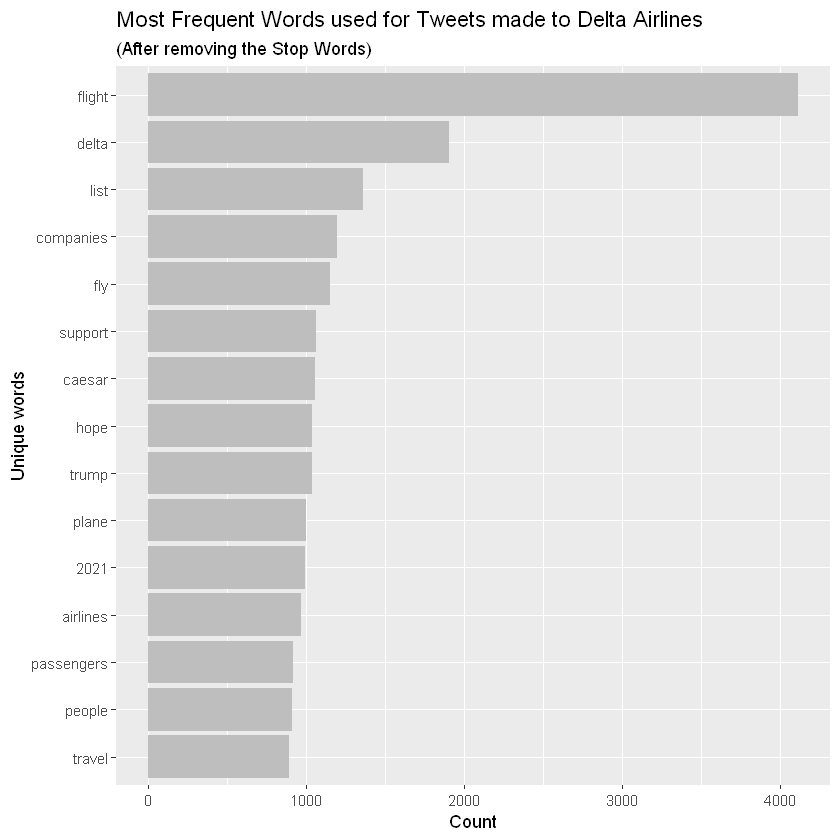

In [13]:
#Displaying the Most Frequent Words used for Tweets to Delta Airlines (with the help of a Bar Graph)
tweets_to %>% 
          count(word, sort = TRUE) %>%
          top_n(15) %>%
          mutate(word = reorder(word, n)) %>%
          ggplot(aes(x = word, y = n)) +
          geom_col(fill="grey") +
          xlab(NULL) +
          coord_flip() +
          labs(y = "Count",
          x = "Unique words",
          title = "Most Frequent Words used for Tweets made to Delta Airlines",
          subtitle = "(After removing the Stop Words)")

sentiment,n
negative,4781
positive,2005


Joining, by = "word"
Selecting by n


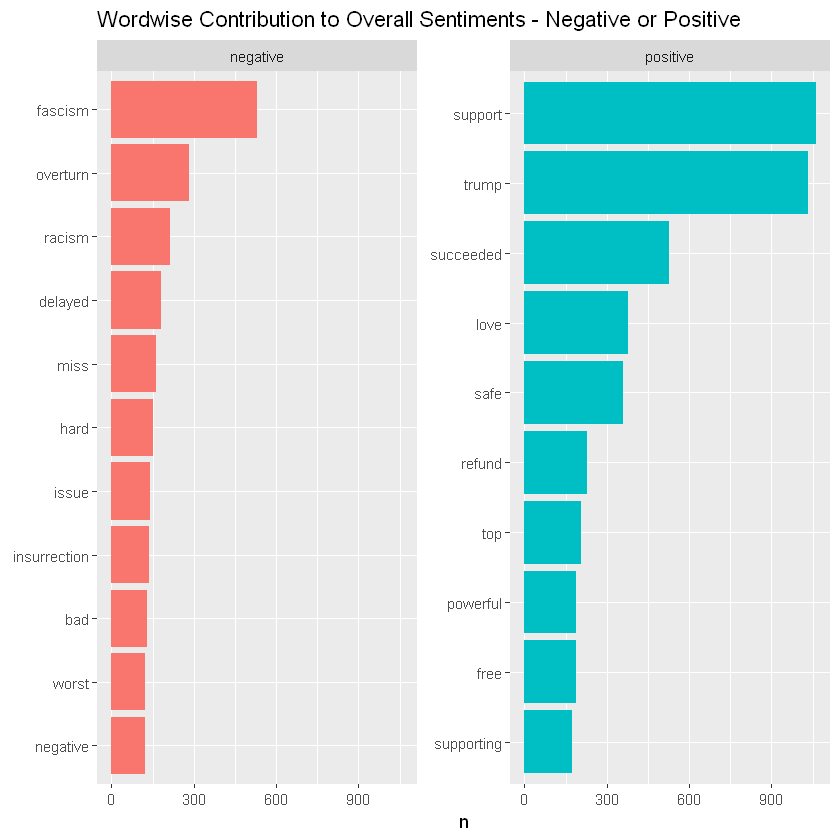

In [13]:
# Sentiment Analysis of Tweets to Delta Airlines

get_sentiments("bing") %>% count(sentiment)

tweets_to_sentiment  <- inner_join(tweets_to,get_sentiments("bing"))

tweets_to_delta_summary <- tweets_to_sentiment %>%  
                           count(word,sentiment,sort=TRUE) %>%
                           group_by(sentiment) %>%
                           top_n(10) %>%  
                           arrange(n) %>%
                           as.data.frame(stringsAsFactors=FALSE)

tweets_to_delta_summary%>% ungroup() %>%
                           mutate(word = reorder(word, n)) %>%
                           ggplot(aes(word, n, fill = sentiment)) +
                           geom_col(show.legend = FALSE) +
                           facet_wrap(~sentiment, scales = "free_y") +
                           labs(title = "Wordwise Contribution to Overall Sentiments - Negative or Positive", x = NULL) +
                           coord_flip()

## Tweets made "BY" Delta Airlines

In [14]:
# Tweets made by Delta Airlines
# tweets_by_delta <- get_timeline("@Delta", n= 5000, token = my_token)

# Saving the Retrieved Tweets as an Object so that we don't exhaust our usage limit
# saveRDS(tweets_by_delta, file = "tweets_by_delta.rds")

In [15]:
# Restoring/Reading the object to use it further for our analysis
tweets_by_delta = readRDS(file = "tweets_by_delta.rds")

In [16]:
# Getting the No Retweet Data
noretweets <- tweets_by_delta[tweets_by_delta$is_retweet==FALSE, ] 
noretweets <- subset(noretweets, is.na(noretweets$reply_to_status_id))

noretweets <- noretweets%>% 
              arrange(-favorite_count)
              noretweets[1,5]

noretweets <- noretweets %>% 
              arrange(-retweet_count)
              noretweets[1,5]

text
"We salute our friend and hometown hero, Hank Aaron, and the legacy he leaves behind. He was unquestionably one of the best to ever step on a baseball field, but his advocacy for disadvantaged youth and voice for civil rights made him truly legendary. Fly on, Hammerin' Hank. https://t.co/jJuiPqhqxE"


text
New restrictions around international travel go into effect today. Here's what you need to know (a thread):


In [17]:
# Keeping only the Retweets
retweets<- tweets_by_delta[tweets_by_delta$is_retweet==TRUE,]

# Keeping only the Replies
replies <- subset(tweets_by_delta, !is.na(tweets_by_delta$reply_to_status_id))

In [18]:
#Removal of Noise and Punctuation
replies$text <-  gsub("https\\S*", "", replies$text)
replies$text <-  gsub("@\\S*", "", replies$text) 
replies$text <-  gsub("amp", "", replies$text) 
replies$text <-  gsub("[\r\n]", "", replies$text)
replies$text <-  gsub("[[:punct:]]", "", replies$text)

In [19]:
# Tokenization and Removal of Stop words
tweets_by <- replies %>%
          select(text) %>%
          unnest_tokens(word, text)

tweets_by <- tweets_by %>%
          anti_join(stop_words)

Joining, by = "word"


Selecting by n


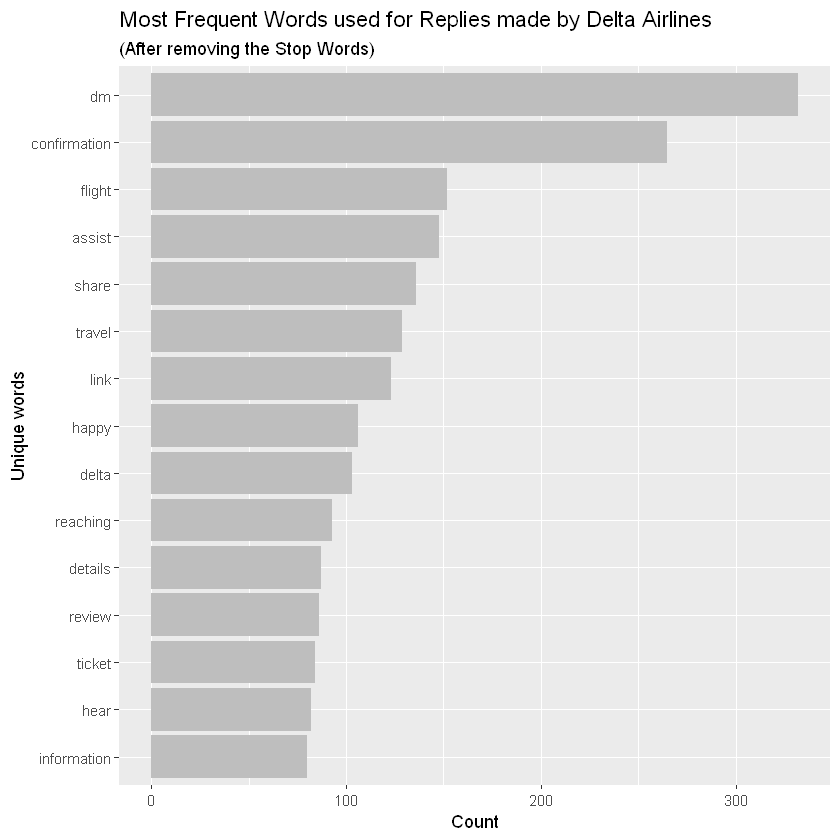

In [20]:
#Displaying the Most Frequent Words used for Replies by Delta Airlines (with the help of a Bar Graph)
tweets_by %>% 
          count(word, sort = TRUE) %>%
          top_n(15) %>%
          mutate(word = reorder(word, n)) %>%
          ggplot(aes(x = word, y = n)) +
          geom_col(fill="grey") +
          xlab(NULL) +
          coord_flip() +
          labs(y = "Count",
          x = "Unique words",
          title = "Most Frequent Words used for Replies made by Delta Airlines",
          subtitle = "(After removing the Stop Words)")

sentiment,n
negative,4781
positive,2005


Joining, by = "word"
Selecting by n


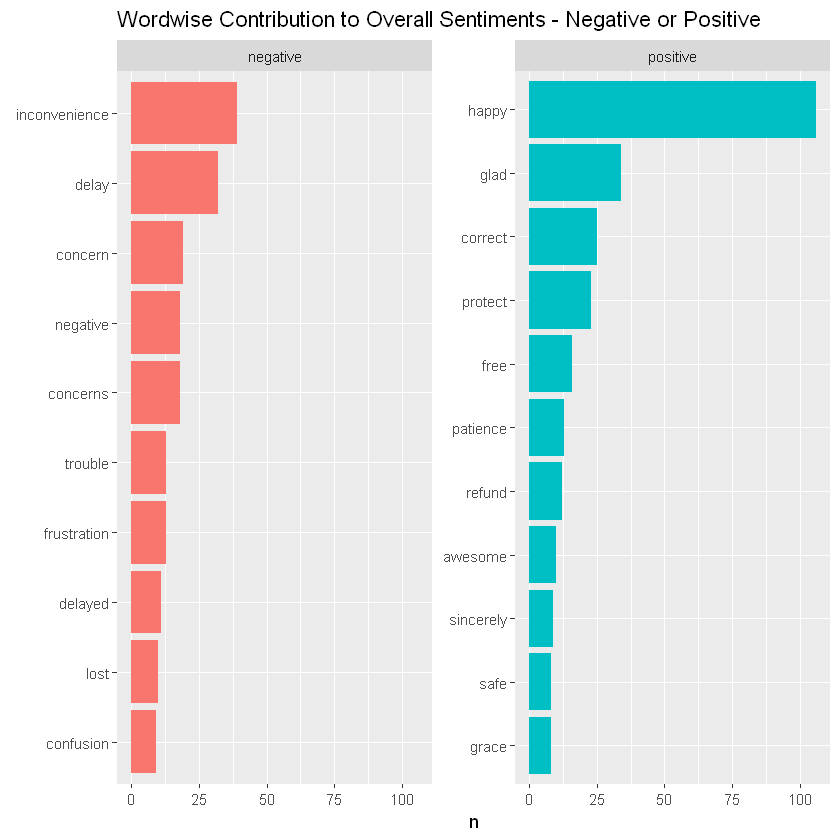

In [21]:
# Sentiment analysis of Replies from Delta Airlines

get_sentiments("bing") %>% count(sentiment)

tweets_by_sentiment <- inner_join(tweets_by,get_sentiments("bing"))

tweets_by_delta_summary <-tweets_by_sentiment %>%  
                          count(word,sentiment,sort=TRUE) %>%
                          group_by(sentiment) %>%
                          top_n(10) %>%  
                          arrange(n) %>%
                          as.data.frame(stringsAsFactors=FALSE)

tweets_by_delta_summary %>%
                          ungroup() %>%
                          mutate(word = reorder(word, n)) %>%
                          ggplot(aes(word, n, fill = sentiment)) +
                          geom_col(show.legend = FALSE) +
                          facet_wrap(~sentiment, scales = "free_y") +
                          labs(title = "Wordwise Contribution to Overall Sentiments - Negative or Positive", x = NULL) +
                          coord_flip()

# Topic Analysis of Tweets from Top 6 Competitors

In [22]:
# Tweets from Competition (done using random sampling)

#tweets_american <- rtweet::search_tweets(q = c("@AmericanAir"),
#                                         n = 500,include_rts = FALSE, token = my_token)

#tweets_united <- rtweet::search_tweets(q = c("@united"),
#                                         n = 500,include_rts = FALSE, token = my_token)

#tweets_skywest <- rtweet::search_tweets(q = c("@skywest"),
#                                         n = 500,include_rts = FALSE, token = my_token)

#tweets_jetblue <- rtweet::search_tweets(q = c("@JetBlue"),
#                                         n = 500,include_rts = FALSE, token = my_token)

#tweets_southwest <- rtweet::search_tweets(q = c("@southwest"),
#                                         n = 500,include_rts = FALSE, token = my_token)

#tweets_comparisons <- rbind(tweets_american,tweets_united, tweets_skywest, tweets_jetblue, tweets_southwest)

#tweets_comparisons  <- mutate(tweets_comparisons , text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

#saveRDS(tweets_comparisons, file = "tweets_comparisons.rds")

In [23]:
tweets_comparisons = readRDS(file = "tweets_comparisons.rds")

comparison_tokenized <- tweets_comparisons %>% 
                        unnest_tokens(output = "word",
                        input = text,
                        token = "words",
                        drop=FALSE,to_lower=TRUE,collapse=NULL)

comparison_tokenized <- comparison_tokenized %>%
                        anti_join(stop_words)%>%      
                        count(status_id,word , sort=TRUE) %>%
                        cast_dtm(document = status_id, term = word,value = n, weighting = tm::weightTf)

lda_comparison <- LDA(comparison_tokenized, k = 3,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )


Joining, by = "word"


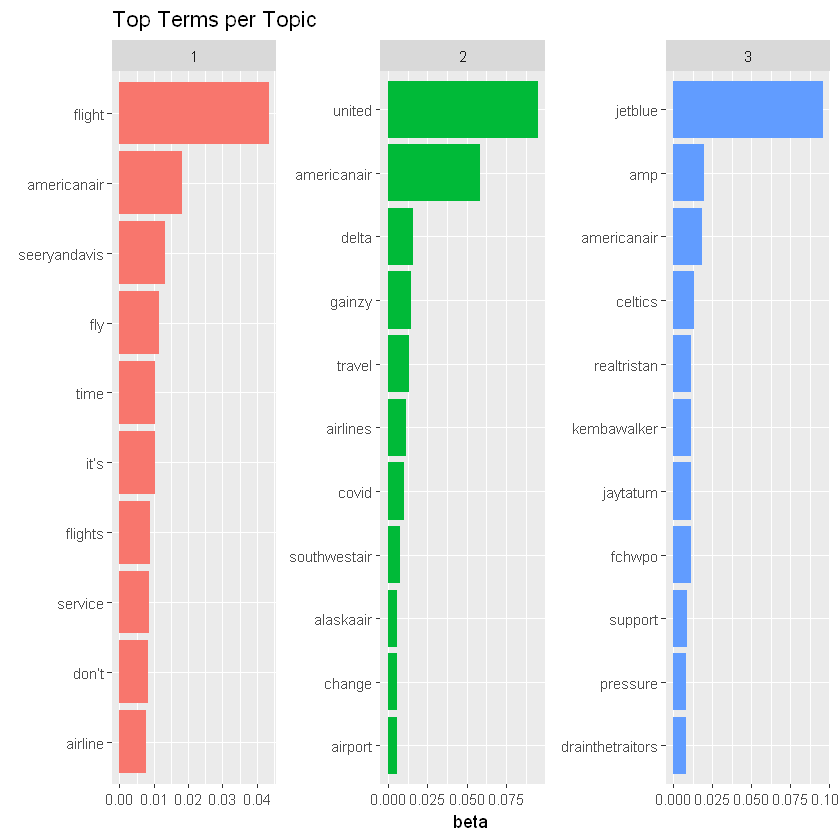

In [24]:
# Top Terms per Topic

comparison_topics <- tidy(lda_comparison, matrix = "beta")

top_comparison_terms <- comparison_topics %>%
                          group_by(topic) %>%
                          top_n(10, beta) %>%
                          ungroup() %>%
                          arrange(topic, -beta)

top_comparison_terms %>%
                     mutate(term = reorder_within(term, beta, topic)) %>%
                     ggplot(aes(term, beta, fill = factor(topic))) +
                     geom_col(show.legend = FALSE) +
                     facet_wrap(~ topic, scales = "free") +
                     coord_flip() +
                     labs(title = "Top Terms per Topic", x = NULL) +
                     scale_x_reordered()

## Top 10 Most Liked Tweets of Delta Airlines (in January'2021)

In [4]:
Delta_total = readRDS(file = "tweets_to_delta_total.rds")

In [27]:
#Most liked tweets
Delta_total %>%
           arrange(-favorite_count) %>%
           top_n(10, favorite_count) %>% 
           select(created_at, screen_name, text, favorite_count)

created_at,screen_name,text,favorite_count
2021-01-09 23:39:05,Lakers,Next stop: H-Town #LakeShow x @Delta https://t.co/0GvfC7wh0q,7050
2021-01-12 05:25:49,Cleavon_MD,KICKED OFF FLIGHT: Melody Black was kicked off a @Delta flight from Washington D.C. to Minneapolis after being identified as a member of the riot at the U.S. Capitol. 1/3 https://t.co/skkuDYVbUd,4211
2021-01-31 17:59:22,AshaRangappa_,"Just a reminder that the GOP pushed for major sponsors to pull out from NYC’s Shakespeare in the Park in 2017 bc they performed Julius Caesar with a Trump-like figure playing Caesar, arguing that it was “promoting” his assassination (and they succeeded... @Delta @BankofAmerica) https://t.co/ck2RgZDRtW",1819
2021-01-09 19:37:15,ConservaMomUSA,<U+0001F6A8>Fascism Takes Flight! @Delta lands a plane to remove passengers for having a PRIVATE conversation about their support for President #Trump! https://t.co/9AVxvJ9JrR,1421
2021-01-19 20:12:47,SilverNumber1,Finally @Delta changed up their movie selection! Time to watch the new Bill and Ted,1001
2021-01-12 19:33:23,marcusdipaola,"A militia group called for 4,000 armed combatants to surround the U.S. Capitol and published rules of engagement. I have contacted @united, @americanair, and @Delta to find out if they will allow terrorists to bring firearms in their checked baggage to Washington D.C. airports.",834
2021-01-21 20:57:00,NYRangers,And we’re off. <U+2708><U+FE0F> Thanks to our friends @Delta for providing us with safe and clean travel accommodations this year – and for continuing to block middle seats on commercial flights through March. https://t.co/KxE4UVmuq1,602
2021-01-01 09:21:25,stewartcink,Seems to me airlines mostly take a beating on social media. They do a lot of good that goes unreported. Today @delta went the extra mile and helped make a huge difference in our travel when plans could have unraveled. #excellence,440
2021-01-29 02:58:20,maximum,Cannot begin to understate how upset I am at @Delta. We showed up to our connecting flight on time and they already closed the gates. We get a flight later and just arrive late tonight just to have the delta bag guy tell us he gave my girlfriends bag to SOMEONE ELSE.,397
2021-01-29 02:58:20,maximum,Cannot begin to understate how upset I am at @Delta. We showed up to our connecting flight on time and they already closed the gates. We get a flight later and just arrive late tonight just to have the delta bag guy tell us he gave my girlfriends bag to SOMEONE ELSE.,395


## Top 10 Most Frequently Shared Links by Delta Airlines (in January'2021)

In [6]:
#Most frequently shared link
Delta_total %>%
      filter(!is.na(urls_expanded_url)) %>% 
      count(urls_expanded_url, sort = TRUE) %>% 
      top_n(10)

Selecting by n



urls_expanded_url,n
<list>,<int>
https://act.boldprogressives.org/whipcount/drain-the-traitors/,132
https://www.opensecrets.org/members-of-congress/elise-stefanik/contributors?cid=N00035523&cycle=2020,64
https://twitter.com/NBCNews/status/1353157099782549506,42
https://twitter.com/funder/status/1350119645915865091,34
https://twitter.com/RoArquette/status/1352978093154000896,24
http://dalscope.org,22
https://twitter.com/charlesbethea/status/1354536651452796932,18
https://twitter.com/nbcnews/status/1353157099782549506,13
https://news.delta.com/ed-bastian-memo-delta-2021,12


## Top 10 Hashtags occurying in the Tweets for Delta Airlines (in January'2021)

Selecting by n


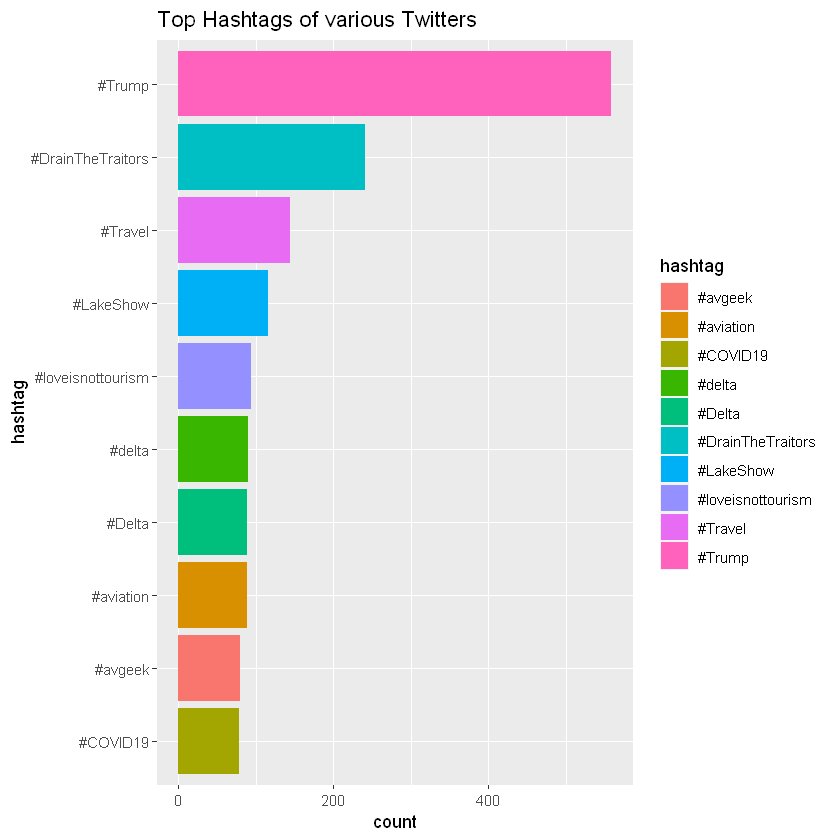

In [29]:
Delta_total %>%
  unnest_tokens(hashtag, text, "tweets", to_lower = FALSE) %>%
  filter(str_detect(hashtag, "^#")) %>%
  count(hashtag, sort = TRUE) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(hashtag,n), y = n, fill = hashtag)) +
              geom_col() +
              coord_flip() +
              labs(x = "hashtag",
              y = "count",
              title = "Top Hashtags of various Twitters")

## Top 10 Mentions in the Tweets for Delta Airlines (in January'2021)

Selecting by n


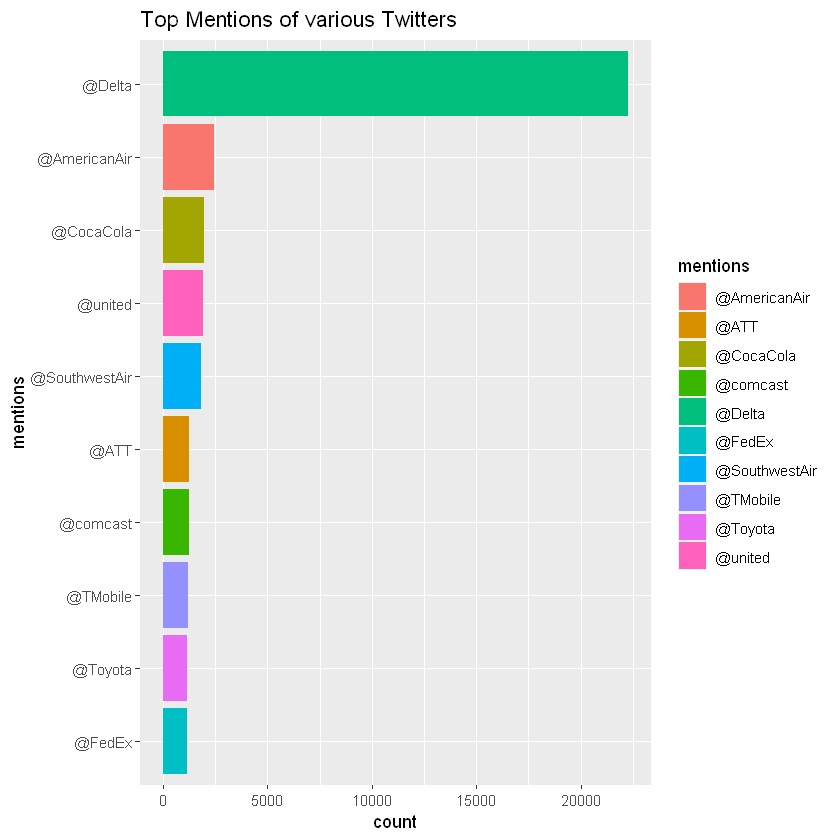

In [30]:
Delta_total %>%
          unnest_tokens(mentions, text, "tweets", to_lower = FALSE) %>%
          filter(str_detect(mentions, "^@")) %>%  
          count(mentions, sort = TRUE) %>%
          top_n(10) %>%
          ggplot(aes(x = reorder(mentions,n), y = n, fill = mentions)) +
          geom_col() +
          coord_flip() +
          labs(x = "mentions",
               y = "count",
               title = "Top Mentions of various Twitters")

# Analysis of "Twitter Status Frequency"

In [32]:
Delta_clean = readRDS(file = "tweets_delta_clean.rds")

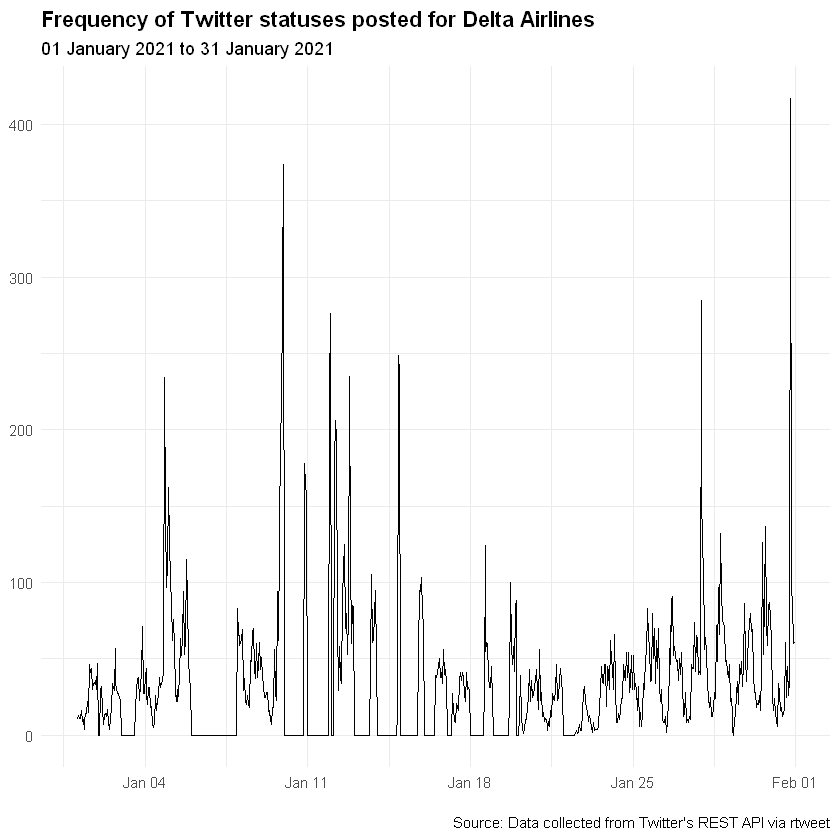

In [33]:
Delta_clean %>%
              ts_plot("hours") +
              ggplot2::theme_minimal() +
              ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
              ggplot2::labs(x = NULL, y = NULL,
              title = "Frequency of Twitter statuses posted for Delta Airlines",
              subtitle = paste0(format(min(Delta_clean$created_at), "%d %B %Y"), " to ", 
                                format(max(Delta_clean$created_at),"%d %B %Y")),
              caption = "\nSource: Data collected from Twitter's REST API via rtweet"
              )

In [35]:
#Frequency of Twitter statuses
# tmls <- get_timelines("Delta", n = 3000, token = my_token)

# saveRDS(tmls, file = "freq_twitter_status.rds")

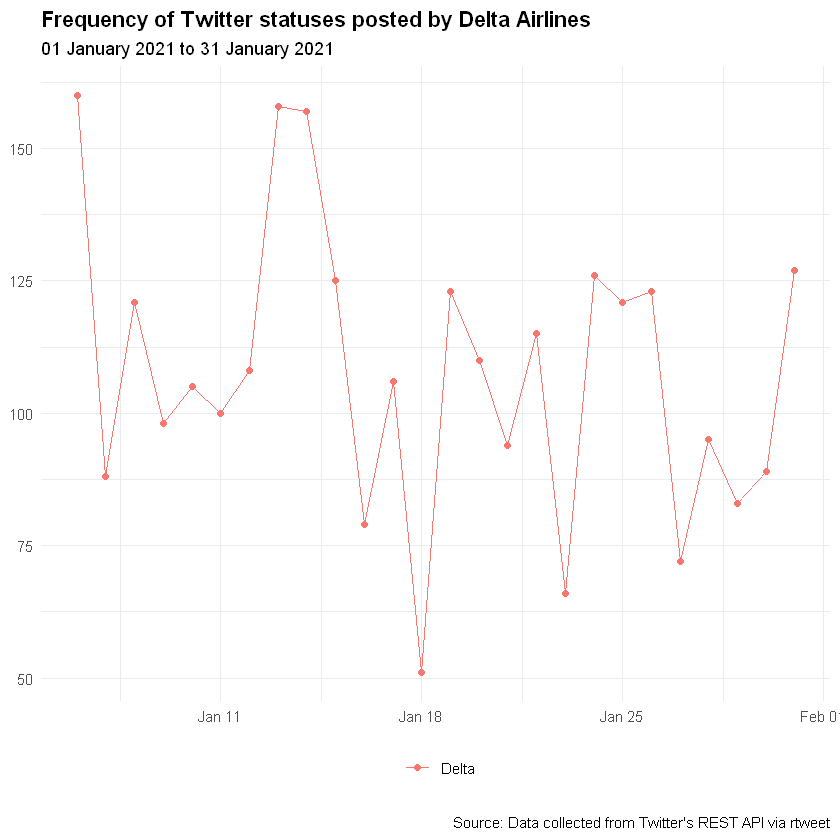

In [36]:
tmls = readRDS(file = "freq_twitter_status.rds")

tmls %>%
      dplyr::filter(created_at > "2020-12-30") %>%
      dplyr::group_by(screen_name) %>%
      ts_plot("days", trim = 1L) +
      ggplot2::geom_point() +
      ggplot2::theme_minimal() +
      ggplot2::theme(
      legend.title = ggplot2::element_blank(),
      legend.position = "bottom",
      plot.title = ggplot2::element_text(face = "bold")) +
      ggplot2::labs(x = NULL, y = NULL,
      title = "Frequency of Twitter statuses posted by Delta Airlines",
      subtitle = paste0(format(min(Delta_clean$created_at),"%d %B %Y"), " to ", 
                        format(max(Delta_clean$created_at),"%d %B %Y")),
      caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

## Top 10 Tweeter Users making Maximum No. of Tweets (in January'2021)

Selecting by n


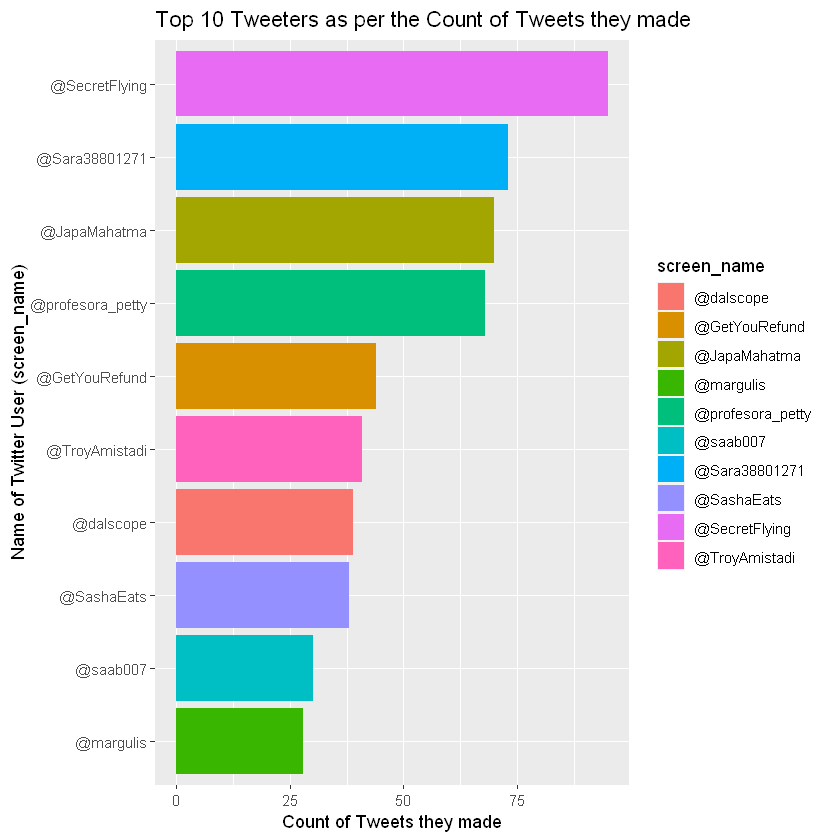

In [37]:
# Top tweeters
tweets_to_delta %>% 
              count(screen_name, sort = TRUE) %>%
              top_n(10) %>%
              mutate(screen_name = paste0("@", screen_name)) %>%
              ggplot(aes(x = reorder(screen_name,n), y = n, fill = screen_name)) +
              geom_col() +
              coord_flip() +
              labs(x = "Name of Twitter User (screen_name)",
              y = "Count of Tweets they made",
              title = "Top 10 Tweeters as per the Count of Tweets they made")

## Top Plaforms used by Users Tweeting about Delta Airlines

In [38]:
install.packages("forestmangr")

also installing the dependency 'tibble'




  There is a binary version available but the source version is later:
       binary source needs_compilation
tibble  3.0.5  3.0.6              TRUE

  Binaries will be installed
package 'tibble' successfully unpacked and MD5 sums checked
package 'forestmangr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\RtmpOCI713\downloaded_packages


In [39]:
td_app <- Delta_clean %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())
td_app <- subset(td_app, count > 11)

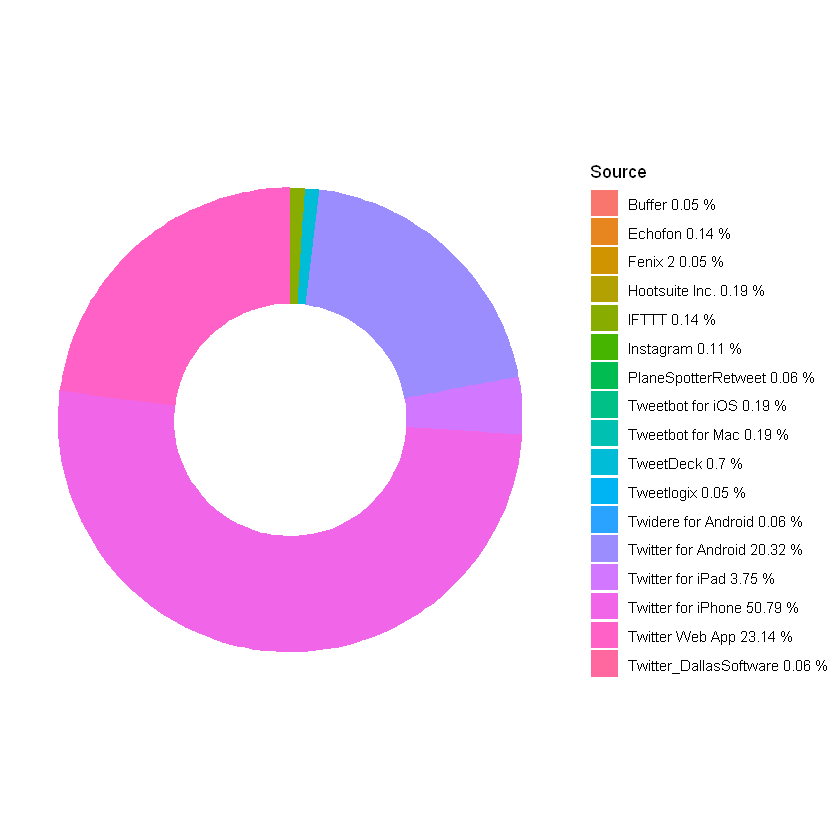

In [40]:
library(forestmangr)
data <- data.frame(
  category=td_app$source,
  count=td_app$count
)
data$fraction = data$count / sum(data$count)
data$percentage = data$count / sum(data$count) * 100
data$ymax = cumsum(data$fraction)
data$ymin = c(0, head(data$ymax, n=-1))
data <- round_df(data, 2)
Source <- paste(data$category, data$percentage, "%")
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

## Top Languages Spoken by Users that follow Delta Airlines

In [41]:
# Getting a random Followers data for Delta airlines
#delta_fol          <- get_followers("Delta", token = my_token)
#info_followers     <- lapply(delta_fol[1:10,],lookup_users, token = my_token)$user_id
#delta_followers    <- data.frame(info_followers)
#delta_memberships  <- do_call_rbind(lapply(delta_followers[1:50,1],lists_memberships,n=50, token = my_token))

#saveRDS(delta_memberships, file = "delta_memberships.rds")

In [42]:
# Reading the object stored in previous step for our further analysis
delta_memberships = readRDS(file = "delta_memberships.rds")

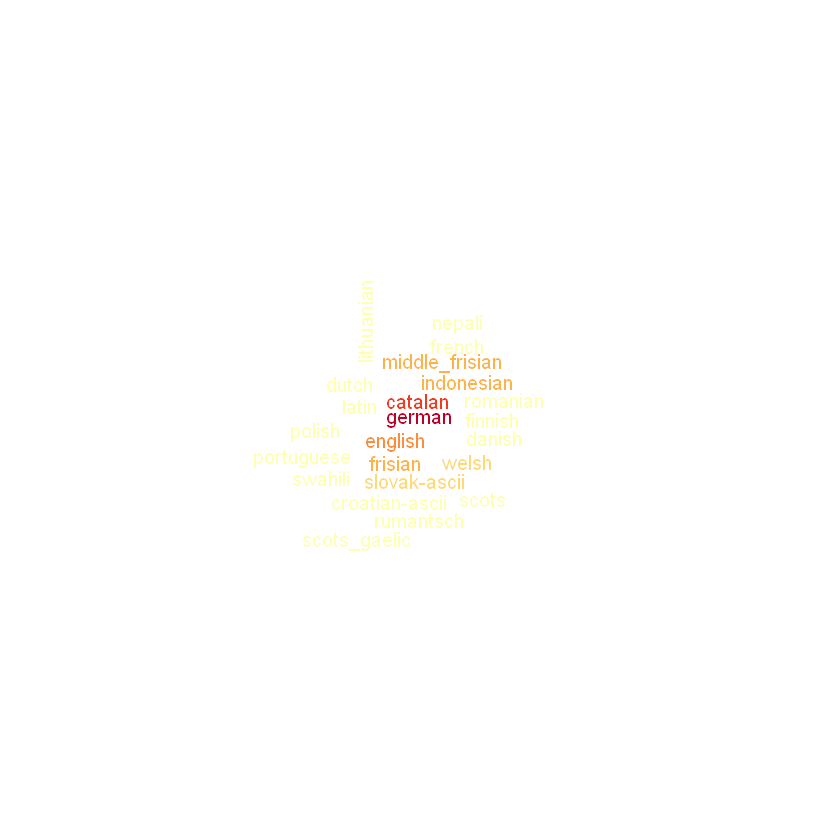

In [43]:
# Topic modelling for the Memberships 
delta_memberships$name <-  gsub("@\\S*", "", delta_memberships$name)

# Detect the Language per column "name"
delta_memberships$language <- textcat(delta_memberships$name)

cloud_languages <- termFreq(delta_memberships$language)

wordcloud(names(cloud_languages),cloud_languages,max.words=50,scale=c(1,1),
          colors = brewer.pal(6,"YlOrRd"),random.order=FALSE)

## Top Locations of Users Tweeting about Delta Airlines

In [44]:
# Searching for 1000 random users and analyzing their Locations
# user_info <- search_users(q = "delta", n = 1000, token = my_token)

# saveRDS(user_info, file = "user_info.rds")

Selecting by n


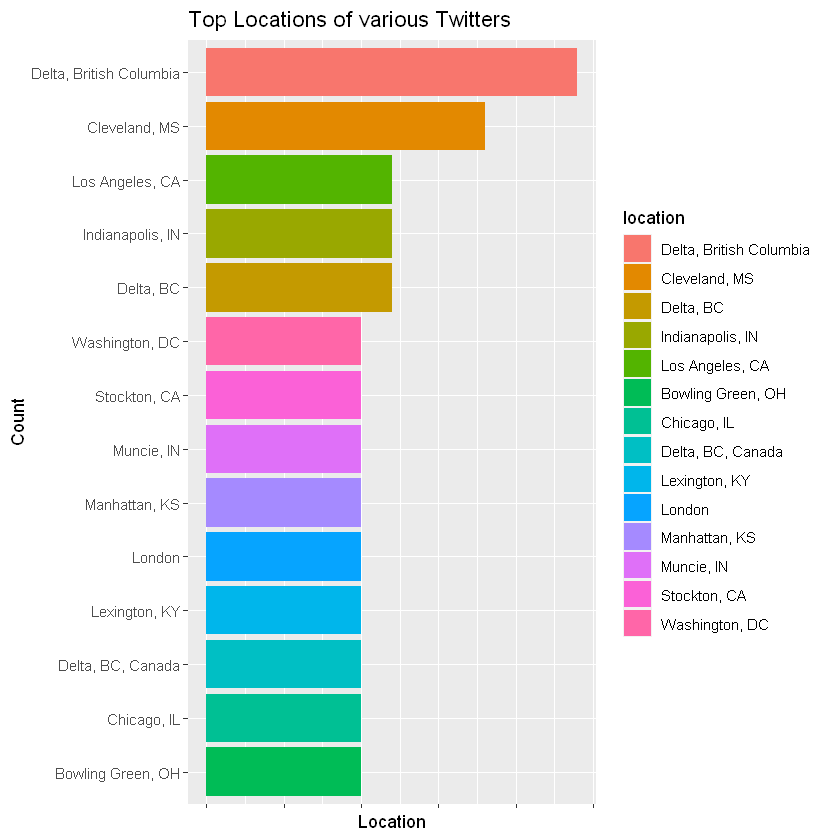

In [45]:
user_info = readRDS(file = "user_info.rds")

library(ggplot2)

user_info %>% filter(location!="") %>% count(location, sort = TRUE) %>%
              mutate(location = reorder(location, n, desc)) %>%
              top_n(10)%>%
              ggplot(aes(x = reorder(location, n), y = n, fill = location)) +
              geom_col() +
              coord_flip() +
              labs(x = "Count",
              y = "Location",
              title = "Top Locations of various Twitters") + 
              theme(axis.text.x=element_blank())


## World Map showing Global Distribution of Users Tweeting about Delta Airlines 

Loading required package: maps


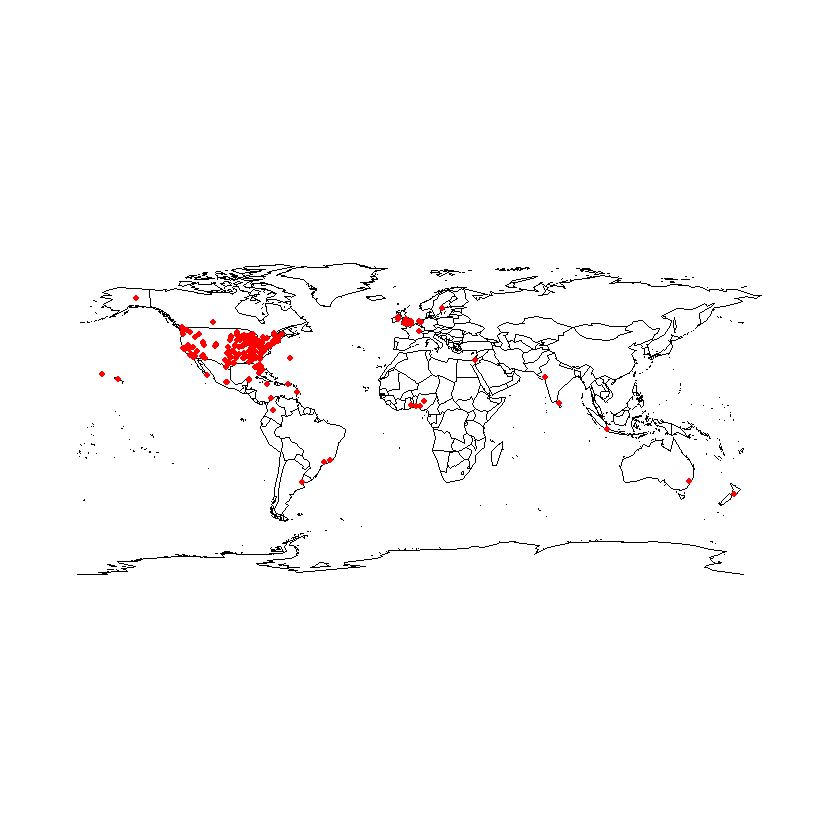

In [46]:
# Add latitude and longitude when possible
lat_lng_data <- lat_lng(Delta_clean)

# Install maps package
if(!require("maps")) install.packages("maps"); library("maps")

## Make a map of the world with country boundaries
par(mar = c(0, 0, 0, 0))
maps::map("world", lwd = .25)

## Plot lat and lng points onto world map
points(lat_lng_data$lng, lat_lng_data$lat, pch = 20, cex = 1,col="red")

# Sentiment Analysis (Classifying Tweets into 10 different Emotions ) -  

##### Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust, Negative and Positive. <br/>

In [47]:
require(syuzhet)

Loading required package: syuzhet

Attaching package: 'syuzhet'

The following object is masked from 'package:rtweet':

    get_tokens

The following object is masked from 'package:scales':

    rescale



In [48]:
#We will first try to get the emotion score for each of the tweets. 

Delta_clean.df <- as.vector(Delta_clean$text)

emotion.df1 <- get_nrc_sentiment(Delta_clean.df)

emotion.df2 <- cbind(Delta_clean$text, emotion.df1) 

head(emotion.df2)

Delta_clean$text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
If were not getting 2000 I expect the governmentsubsided and to provide us with a loaded gas card frequent flyer miles and a waived Prime subscription,0,1,0,0,0,0,1,2,0,3
please help Luke with this Were still in the middle of a global pandemic and your flexibility would be much appreciated,0,0,0,1,0,1,0,0,1,1
Where would you go if enough people got vaccinated,0,0,0,0,0,0,0,0,0,0
I agree I feel very safe flying,0,0,0,1,1,0,0,1,0,3
can you cancel the refund and fix my ticket i was advice not to use the LaGuardia Airport and use the JFK airport because it closer you have my information you can step in am listening,0,1,0,0,0,1,0,1,1,1
I am force to have to cancel my flight and pick a different airport in New York all I ask for was to switch from LGA to JFK I am pissed off I am unhappy you treating basic flight this way,2,1,1,1,0,2,0,0,3,1


In [49]:
# Converting tweets to ASCII to trackle strange characters
emotions               <- iconv(Delta_clean, from="UTF-8", to="ASCII", sub="")

# removing retweets, in case needed 
emotions               <- gsub("(RT|via)((?:\\b\\w*@\\w+)+)","",emotions)

# removing mentions, in case needed
emotions               <- gsub("@\\w+","",emotions)

ew_sentiment           <- get_nrc_sentiment((emotions))

sentimentscores        <- data.frame(colSums(ew_sentiment[,]))

names(sentimentscores) <- "Score"

sentimentscores <- cbind("sentiment"=rownames(sentimentscores),sentimentscores)

rownames(sentimentscores) <- NULL

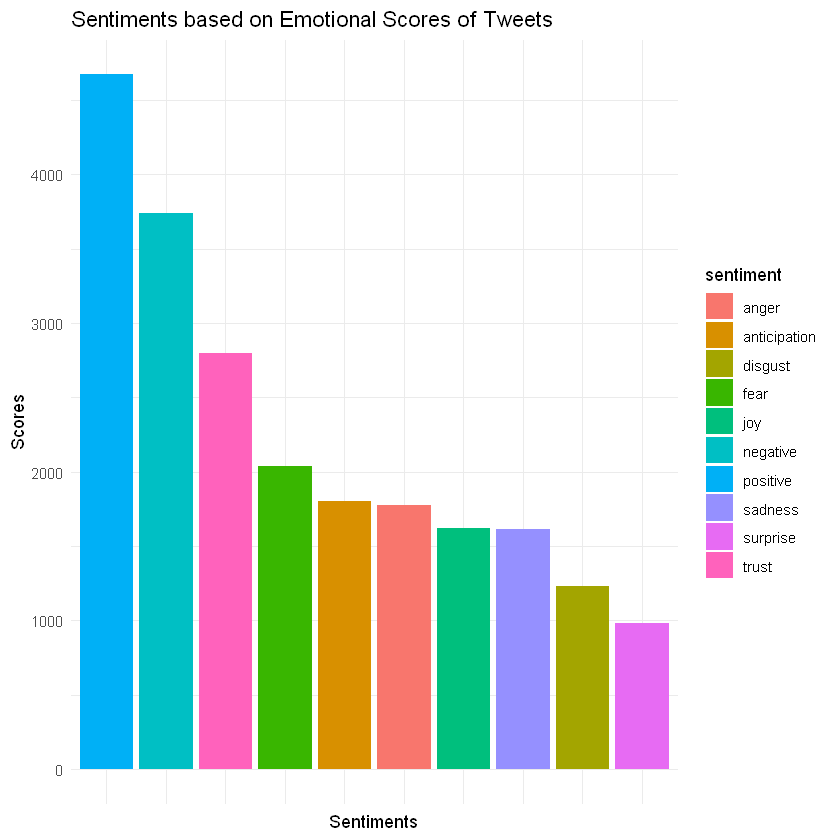

In [50]:
ggplot(data=sentimentscores,aes(x=reorder(sentiment,-Score),y=Score))+
              geom_bar(aes(fill=sentiment),stat = "identity")+
              theme(legend.position="none")+
              xlab("Sentiments")+ylab("Scores")+
              ggtitle("Sentiments based on Emotional Scores of Tweets")+
              theme_minimal() + 
              theme(axis.text.x=element_blank())

# Topic Analysis using Bigram 

In [51]:
# load some packages that we will use
for (i in c('SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}

Loading required package: SnowballC
Loading required package: slam
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: hunspell
Loading required package: purrr

Attaching package: 'purrr'

The following object is masked from 'package:maps':

    map

The following objects are masked from 'package:igraph':

    compose, simplify

The following object is masked from 'package:rtweet':

    flatten

The following object is masked from 'package:scales':

    discard

Loading required package: RWeka
Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


package 'RWeka' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\RtmpOCI713\downloaded_packages


Loading required package: RWeka
Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


## For Tweets "TO" Delta Airlines

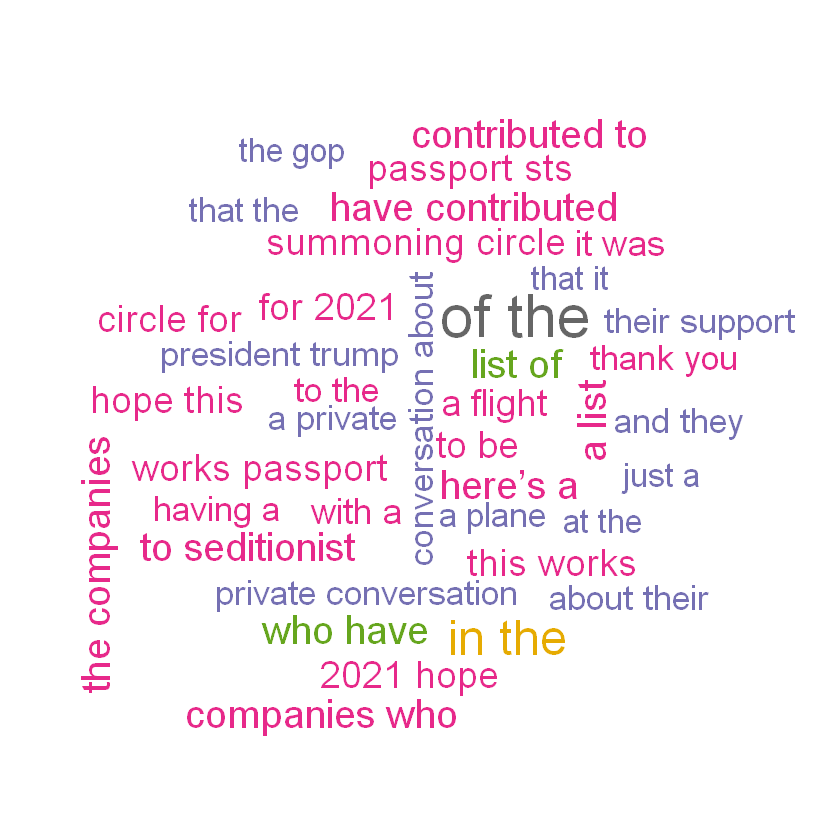

In [52]:
# Impletmenting bigrams

temp1 <- mutate(tweets_to_delta, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))

To_Delta_Count <- temp1 %>% unnest_tokens(output = "bigram", 
                                                   input = text,
                                                   token = "ngrams", n=2, drop=FALSE) %>% count(status_id,bigram)
To_Delta_DTM <- To_Delta_Count %>% cast_dtm(status_id,bigram,n)

# Making the Word Cloud 

to_delta_bigram <- To_Delta_Count %>% group_by(bigram) %>% summarize(freq = n())
wordcloud(to_delta_bigram$bigram, to_delta_bigram$freq, max.words = 40, scale=c(3,1), colors = brewer.pal(8,"Dark2"))

## For Tweets "BY" Delta Airlines

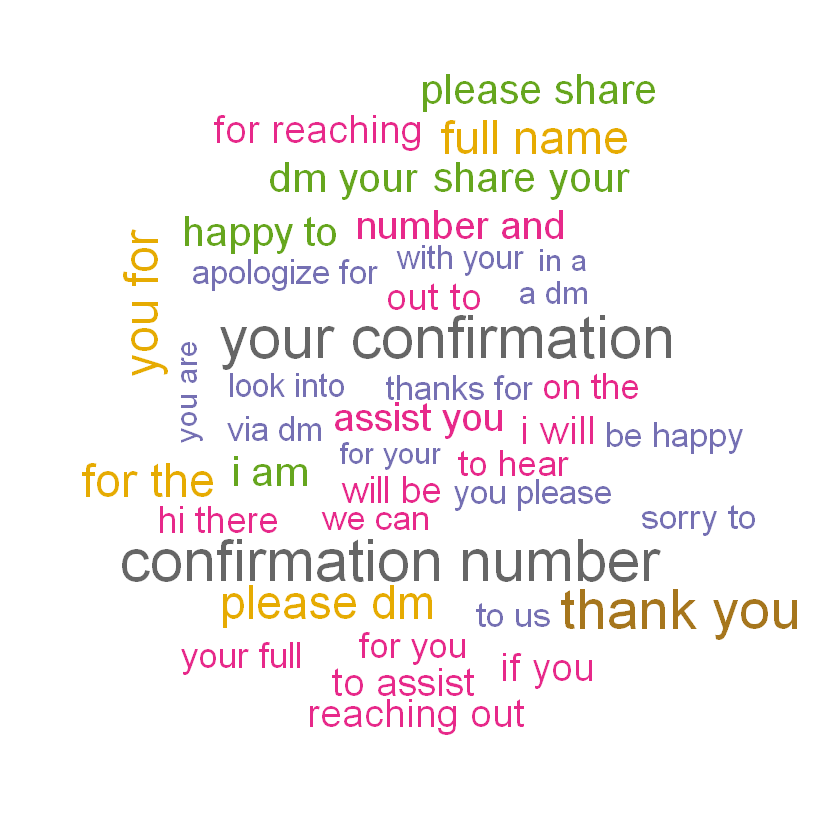

In [53]:
# Impletmenting bigrams

temp2 <- mutate(tweets_by_delta, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))

To_Delta_Count <- temp2 %>% unnest_tokens(output = "bigram", 
                                                   input = text,
                                                   token = "ngrams", n=2, drop=FALSE) %>% filter(bigram!="t.co 6idgbjrmtu") %>% count(status_id,bigram)
To_Delta_DTM <- To_Delta_Count %>% cast_dtm(status_id,bigram,n)

# Making the Word Cloud 

to_delta_bigram <- To_Delta_Count %>% group_by(bigram) %>% summarize(freq = n())
wordcloud(to_delta_bigram$bigram, to_delta_bigram$freq, max.words = 40, scale=c(3,1), colors = brewer.pal(8,"Dark2"))

# WordCloud for "Tweets to Delta Airlines"

In [54]:
if (!require("wordcloud")) {
  install.packages("wordcloud",repos="https://cran.rstudio.com/",quiet=TRUE)
  require("wordcloud")
}

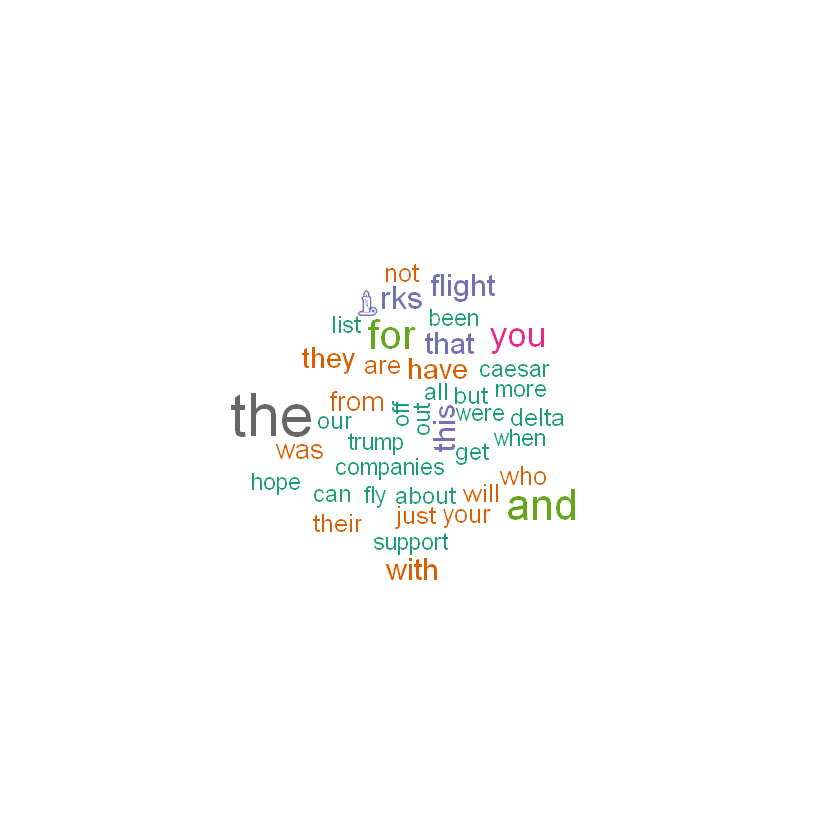

In [55]:
# Word cloud BEFORE text pre-processing

tf <- termFreq(tweets_to_delta$text)

wordcloud(names(tf),tf,max.words=40,scale=c(3,1), colors = brewer.pal(8,"Dark2"))

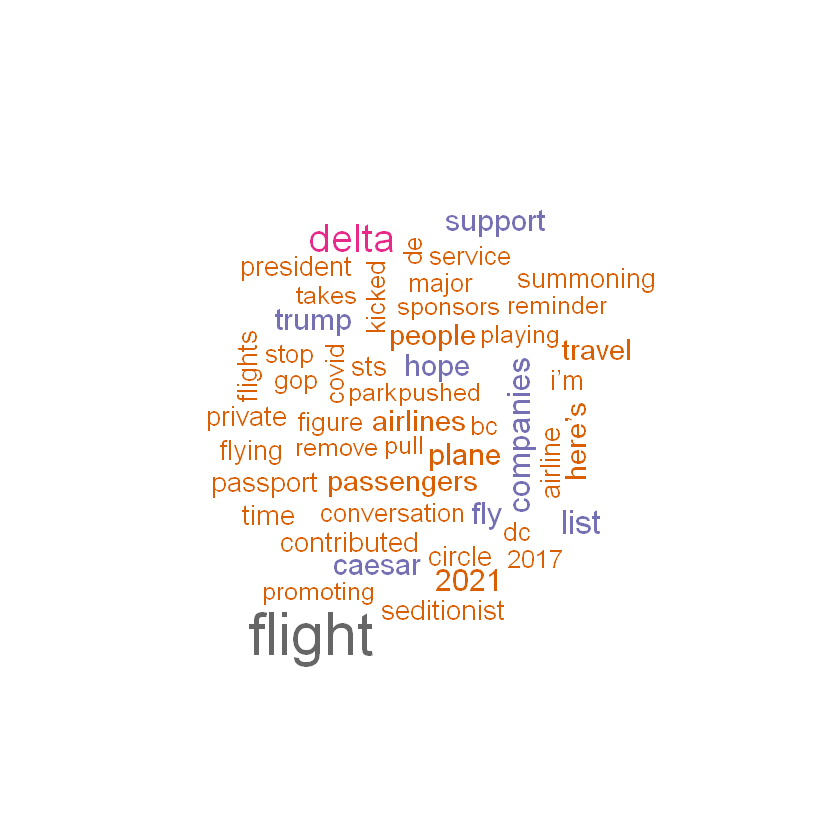

In [56]:
# Word cloud AFTER text pre-processing

tweets_freq <- tweets_to %>%
               group_by(word) %>% 
               summarize(freq = n()) %>%
               arrange(-freq) 

wordcloud(tweets_freq$word, tweets_freq$freq, max.words=50, scale=c(3,1), colors = brewer.pal(8,"Dark2"))

# WordCloud for "Tweets by Delta Airlines"

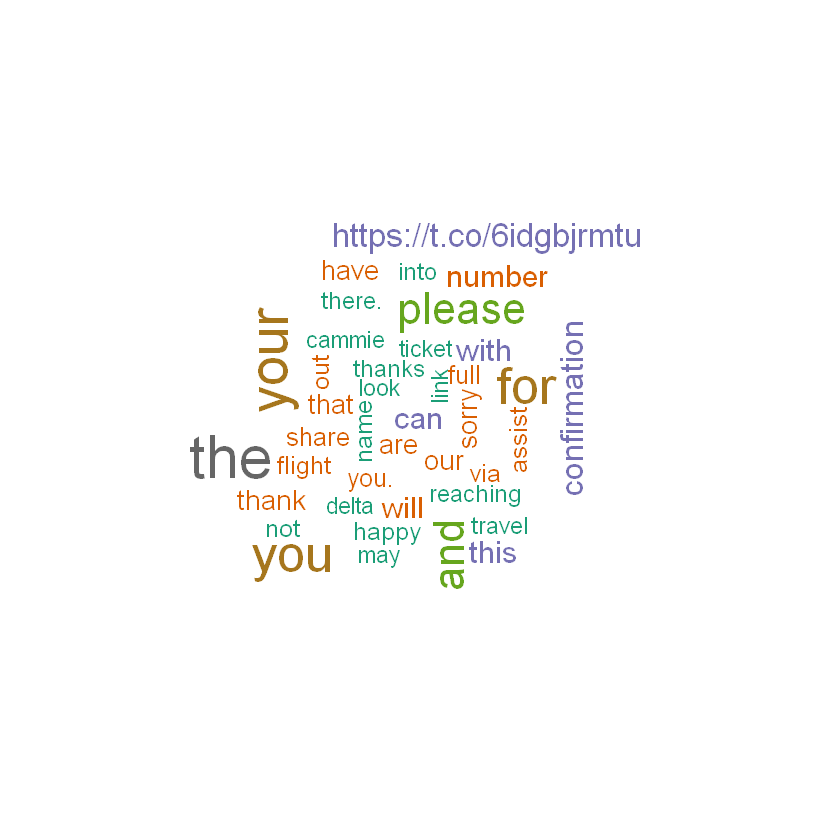

In [57]:
# Word cloud BEFORE text pre-processing

tf <- termFreq(tweets_by_delta$text)

wordcloud(names(tf),tf,max.words=40,scale=c(3,1), colors = brewer.pal(8,"Dark2"))

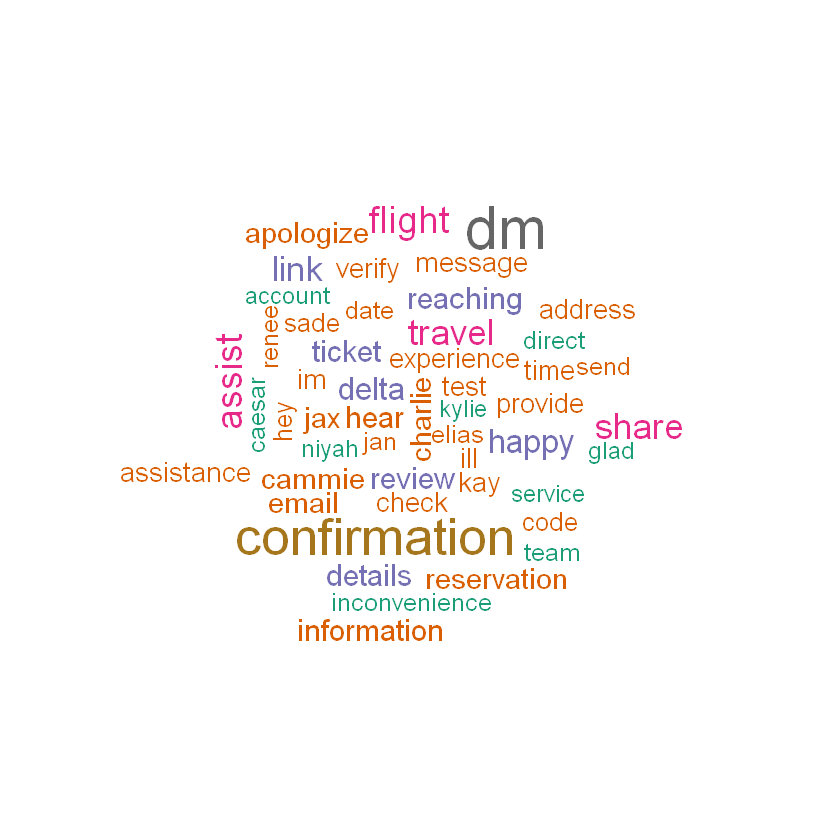

In [58]:
# Word cloud AFTER text pre-processing

tweets_freq <- tweets_by %>%
               group_by(word) %>% 
               summarize(freq = n()) %>%
               arrange(-freq) 

wordcloud(tweets_freq$word, tweets_freq$freq, max.words=50, scale=c(3,1), colors = brewer.pal(8,"Dark2"))